<a href="https://colab.research.google.com/github/Ayanlola2002/Data-Science-Nigeria/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Loading Neccessary python libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
#loding dataset
df=pd.read_csv('/content/StudentsPerformance (5).csv')
df.shape

(1000, 8)

In [3]:
#Summary statistics of Datatypes
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [4]:
#Summary Metric for data description
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [0]:

def histograms_plot(dataframe, features, rows, cols):
   fig=plt.figure(figsize=(20,20))
   for i, feature in enumerate(features):
     ax=fig.add_subplot(rows,cols,i+1)
     dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
     ax.set_title(feature+" Distribution",color='red')
     fig.tight_layout()  
     plt.show()

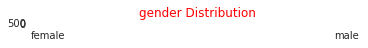

AssertionError: ignored

<Figure size 432x288 with 0 Axes>

In [10]:
histograms_plot(df,df.columns,1000,3)

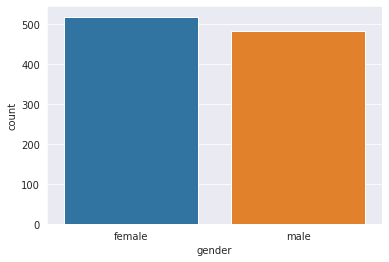

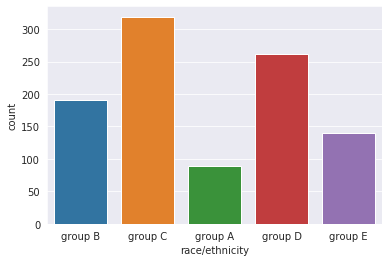

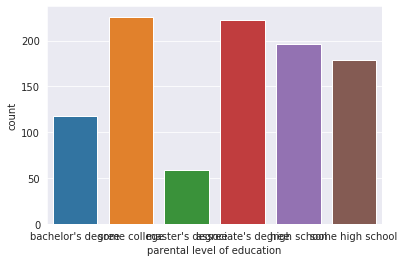

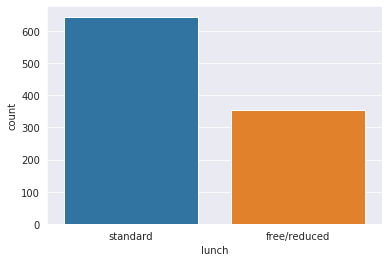

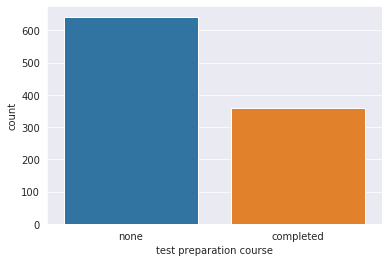

In [11]:
#Data distribution of categorical varriable
df1 = df.select_dtypes([np.object])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df1)

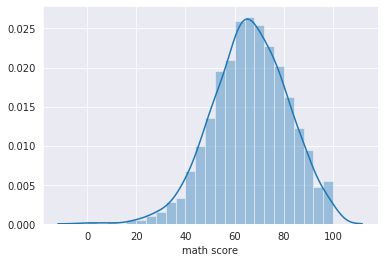

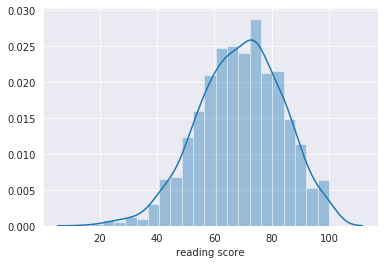

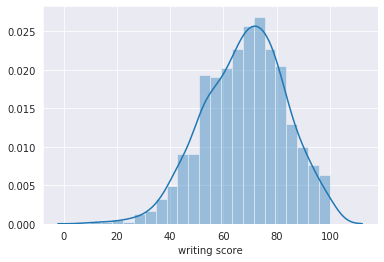

In [12]:
#Distribution of Continous varriable
df2 = df.select_dtypes([np.int, np.float])

for i, col in enumerate(df2.columns):
    plt.figure(i)
    sns.distplot(df2[col])

In [0]:
#Adding new varriable
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score'] 
df['Average_Score'] = df['Total_Marks']/3 

In [0]:
def score_to_grade(score):
    breakpoints = [40,45,50,55,60,65,70,75, 101]
    grades = ['F9', 'E8', 'D7', 'C6', 'C5', 'C4','B3','B2','A1']
    for breakpoint, grade in zip(breakpoints, grades):
        if score < breakpoint:
            return grade


In [0]:
#New Varriable Averge Category
df["Average_Score_cat"]=df.apply(lambda x:score_to_grade(x['Average_Score']),axis=1)

In [24]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Marks,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333
